<a href="https://colab.research.google.com/github/graciousgift/Assignment-file/blob/main/wk_7_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Day 2

## Unsupervised Machine Learning

### Objectives

* Examples
    * **K Means (Clustering)**
    * **Principal Component Analysis (PCA)**
    
<br>

### Types of Categorical Variables Encoding

* One-hot 
* Ordinal
* Count Frequency
* Mean 
* Weight of Evidence

<hr>

## Unsupervised Machine Learning

* **Unsupervised Machine Learning** refers to a class of algorithm that discovers patterns from **unlabelled** data.
* These algorithms are referred to as **`unsupervised`** because they identify hidden patterns in data **without the assistance of a human**.
* Examples include:
    * K Means (for clustering)
    * PCA (Dimensionality reduction)
    * Neural Networks
    
* **Applications**:
    * Data exploration
    * Customer segmentation
    * Recommender systems
    * Target marketing campaigns, etc.
    
<hr><br>

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [ ]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ',', '\t', etc

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep)
    print(f"Shape of data: {data.shape}\n")
    return data

## Clustering

> Clustering is a type of unsupervised learning wherein data points are grouped into different sets based on their degree of similarity.

### Types of clustering

* Hierarchical clustering: Agglomerative clustering.
* Partitioning clustering: K-Means clustering, Fuzzy C-Means clustering.

### K Means

* K-Means clustering is an unsupervised learning algorithm. 
* In contrast to supervised learning, there is no labeled data for this clustering. 
* With K-Means, data points are divided into **clusters** that share **similarities** and **differ** from those belonging to other **clusters**. i.e similar data points are grouped together and disimilar data points are separated.
* The letter **"K"** stands for the **number of clusters**. The number of clusters you need to create must be specified to the algorithm. K = 2, for instance, denotes the presence of two clusters. 

#### Distance Measure 

* The distance between two elements determines how similar they are and affects how clusters are shaped.

* Various distance measures are supported by K-Means clustering, such as: 
    * Euclidean distance measure
    * Manhattan distance measure 
    * Squared euclidean distance measure
    * Cosine distance measure 

<br>

[![image.png](https://i.postimg.cc/FFJYDW4y/image.png)](https://postimg.cc/K4xcY54j)

<hr>

#### Package For Selecting Best `K`

```bash
pip install kneed
```

In [ ]:
from kneed import KneeLocator

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Generate synthetic data
N_SAMPLES = 500
CENTERS = 3
CLUSTER_STD = 2.05
RANDOM_STATE = 123
TEST_SIZE = 0.2

X, y = make_blobs(
    n_samples=N_SAMPLES,
    centers=CENTERS,
    cluster_std=CLUSTER_STD,
    random_state=RANDOM_STATE,
)

X.shape, y.shape

((500, 2), (500,))

In [ ]:
# This is a matrix (2-D array)
X[:5]

array([[-4.61455161,  1.12334624],
       [ 3.91905481, -2.45968938],
       [ 6.21575873, -0.39611809],
       [-5.13198538, -2.3344684 ],
       [ 5.38460361, -0.1633204 ]])

In [ ]:
data = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
data.columns = ["x1", "x2", "target"]
data.head()

,x1,x2,target
0,-4.614552,1.123346,1
1,3.919055,-2.459689,2
2,6.215759,-0.396118,2
3,-5.131985,-2.334468,1
4,5.384604,-0.163320,2


In [ ]:
data["target"].unique()

array([1, 2, 0])

In [ ]:
data.describe()

,x1,x2,target
count,500.000000,500.000000,500.000000
mean,0.866098,-1.686266,0.998000
std,4.981668,3.070768,0.816903
min,-11.178602,-10.900876,0.000000
25%,-3.933345,-3.973803,0.000000
50%,2.801538,-1.597693,1.000000
75%,4.592346,0.558867,2.000000
max,10.060916,5.783867,2.000000


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X_scaled, columns=["x1", "x2"]).describe()

,x1,x2
count,5.000000e+02,5.000000e+02
mean,7.105427e-18,6.430412e-16
std,1.001002e+00,1.001002e+00
min,-2.420226e+00,-3.003756e+00
25%,-9.643858e-01,-7.456860e-01
50%,3.889017e-01,2.887273e-02
75%,7.487413e-01,7.318629e-01
max,1.847579e+00,2.435095e+00


In [ ]:
round(7.105427e-18, 10)

0.0

### Apply K Means

In [ ]:
K = 3

# Initialize model
kmeans = KMeans(init="random", n_clusters=K, n_init=10, random_state=RANDOM_STATE)

# Fit: It requires no `y` since it's an unsupervised algorithm
kmeans.fit(X_scaled)

# Predict the clusters
y_pred = kmeans.predict(X_scaled)

# The lowest Sum of Squared Error (SSE) value
sse = kmeans.inertia_
sse

227.81241473854004

In [ ]:
# Final locations of the centroid. i.e coordinates of cluster centers
kmeans.cluster_centers_

array([[ 0.63803348,  0.23128026],
       [-1.28963524,  0.91647019],
       [ 0.64374265, -1.11013295]])

In [ ]:
# Number of iterations required to converge
kmeans.n_iter_

6

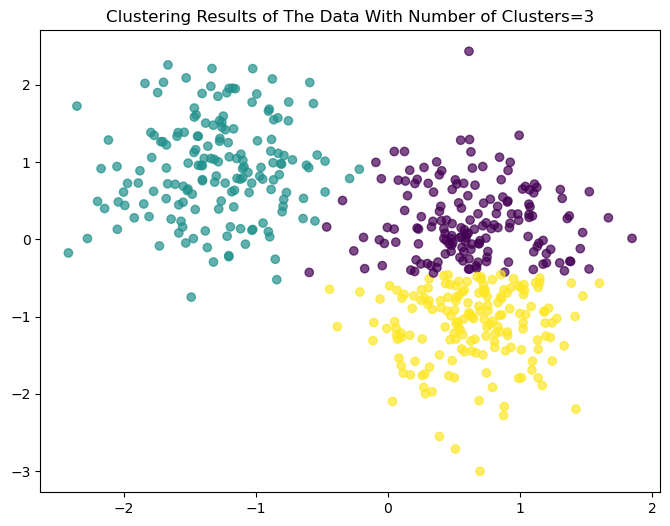

In [ ]:
# Plot the clustered dataset
fig = plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap="viridis", alpha=0.7)
plt.title(f"Clustering Results of The Data With Number of Clusters={K}")
plt.show()

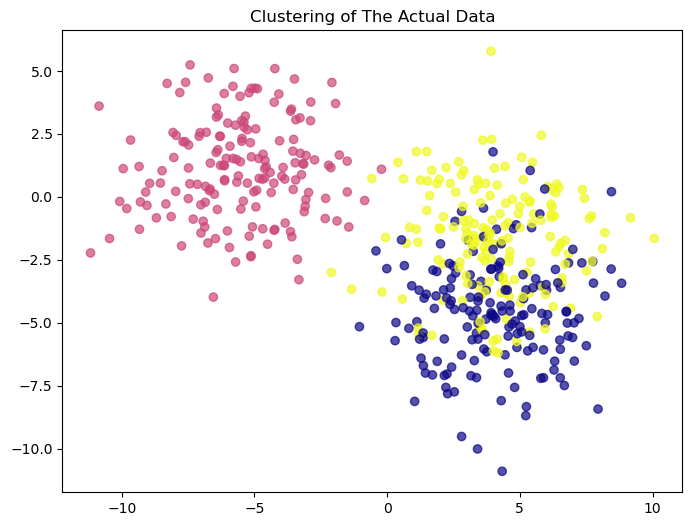

In [ ]:
# Plot the actual dataset (using the labels)
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, alpha=0.7)
plt.title("Clustering of The Actual Data")
plt.show()

In [ ]:
def cluster_data(
    *, X: np.ndarray, K: int, random_state: int = 25, y: Union[np.ndarray, None] = None
) -> None:
    """This is used to cluster the data.

    Params:
        X (np.ndarray): The input data.
        K (int): The number of clusters.
        random_state (int): For reproducibility.
        y (Union[np.ndarray, None]): Whether to plot with the target variable. Default=None.
    """

    # ==== Scale the features ====
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ====Initialize model ====
    kmeans = KMeans(
        init="k-means++", n_clusters=K, n_init=10, random_state=random_state
    )

    # ==== Fit ====
    kmeans.fit(X_scaled)

    # ====Predict the clusters ====
    y_pred = kmeans.predict(X_scaled)

    # The lowest Sum of Squared Error (SSE) value
    sse = kmeans.inertia_

    # ==== Check the value of y ====
    K = K if y is None else 0
    X_value = X_scaled if y is None else X
    y_value = y_pred if y is None else y
    t_1 = f"Clustering Results of The Data With Number of Clusters={K}"
    t_2 = "Clustering of The Actual Data"
    title = t_1 if y is None else t_2

    # Plot the clustered dataset
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X_value[:, 0], X_value[:, 1], c=y_value, cmap=plt.cm.cividis, alpha=0.7)
    plt.title(title)
    plt.show()

In [ ]:
y[:7]

array([1, 2, 2, 1, 2, 1, 2])

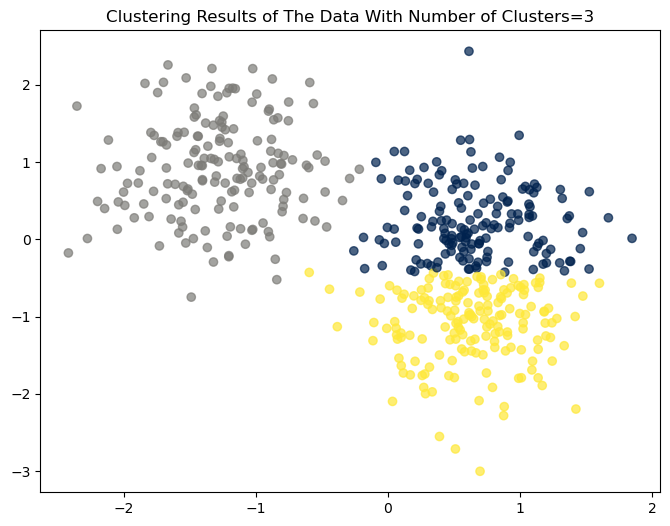

In [ ]:
cluster_data(X=X, K=3, y=None)

### How to Choose the Number of Clusters

* Using `elbow` method.

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": RANDOM_STATE,
}
K = 10
# A list holds the SSE values for each k
sse = []

for k in range(1, K + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    # Calculate and store the error
    sse.append(kmeans.inertia_)

sse

[1000.0,
 369.6372500931946,
 227.81241473854004,
 183.15356366875702,
 148.91352059990902,
 131.1167906747118,
 115.28195432963774,
 100.58969804247502,
 90.37031249523237,
 79.92417832558681]

In [ ]:
{k: error for k, error in zip(range(1, K + 1), sse)}

{1: 1000.0,
 2: 369.6372500931946,
 3: 227.81241473854004,
 4: 183.15356366875702,
 5: 148.91352059990902,
 6: 131.1167906747118,
 7: 115.28195432963774,
 8: 100.58969804247502,
 9: 90.37031249523237,
 10: 79.92417832558681}

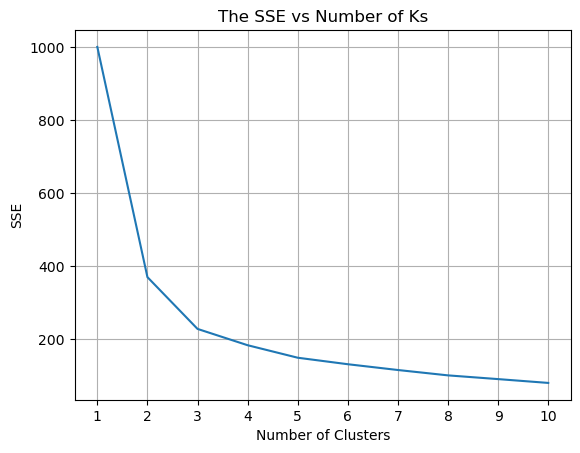

In [ ]:
plt.plot(range(1, K + 1), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("The SSE vs Number of Ks")
plt.grid()
plt.show()

In [ ]:
k_locator = KneeLocator(range(1, K + 1), sse, curve="convex", direction="decreasing")
k_locator.elbow

3

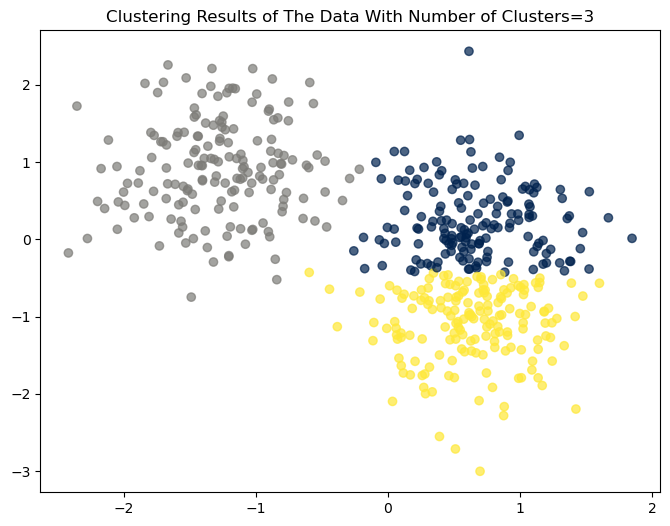

In [ ]:
cluster_data(X=X, K=3, y=None)

## Principal Component Analysis

* **Principal component analysis (PCA)**, a popular technique, is used to analyze **large datasets** with a **high number of dimensions/features** per observation in order to **improve the interpretability** of data while **preserving the most information**. 

* PCA also makes it possible to **visualize multidimensional data**.

In [ ]:
# Import the dataset
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
X, y = breast.data, breast.target


X.shape, y.shape

((569, 30), (569,))

In [ ]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
data.columns = list(breast.feature_names) + ["labels"]

labels_dict = {0: "Benign", 1: "Malignant"}
data["labels"] = data["labels"].map(labels_dict)

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [ ]:
# Scale the data
scaler = StandardScaler()

X = data.drop(columns=["labels"])
y = data["labels"]

X_scaled = scaler.fit_transform(X)

In [ ]:
X.shape

(569, 30)

#### Apply PCA

In [ ]:
from sklearn.decomposition import PCA

NUM_COMPONENTS = 2
pca = PCA(n_components=NUM_COMPONENTS)


# pca.fit(X_scaled)
# pca.transform(X_scaled)

X_pca = pca.fit_transform(X_scaled)


# Amount of variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182])

In [ ]:
sum(explained_variance)

0.6324320765155939

In [ ]:
pca_breast_Df = pd.DataFrame(
    data=X_pca, columns=["principal component 1", "principal component 2"]
)

pca_breast_Df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:
np.where(data["labels"] == "Benign")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  38,  39,  40,  41,  42,
         43,  44,  45,  47,  53,  54,  56,  57,  62,  64,  65,  70,  72,
         73,  75,  77,  78,  82,  83,  85,  86,  87,  91,  94,  95,  99,
        100, 105, 108, 117, 118, 119, 121, 122, 126, 127, 129, 131, 132,
        134, 135, 138, 141, 146, 156, 161, 162, 164, 167, 168, 171, 172,
        177, 180, 181, 182, 184, 186, 190, 193, 194, 196, 197, 198, 199,
        201, 202, 203, 205, 207, 210, 212, 213, 214, 215, 218, 219, 223,
        229, 230, 233, 236, 237, 239, 244, 250, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265, 272, 274, 277, 280,
        282, 283, 297, 300, 302, 317, 321, 323, 328, 329, 330, 335, 337,
        339, 343, 351, 352, 353, 365, 366, 368, 369, 370, 372, 373, 379,
        385, 389, 392, 393, 400, 408, 414, 417, 430

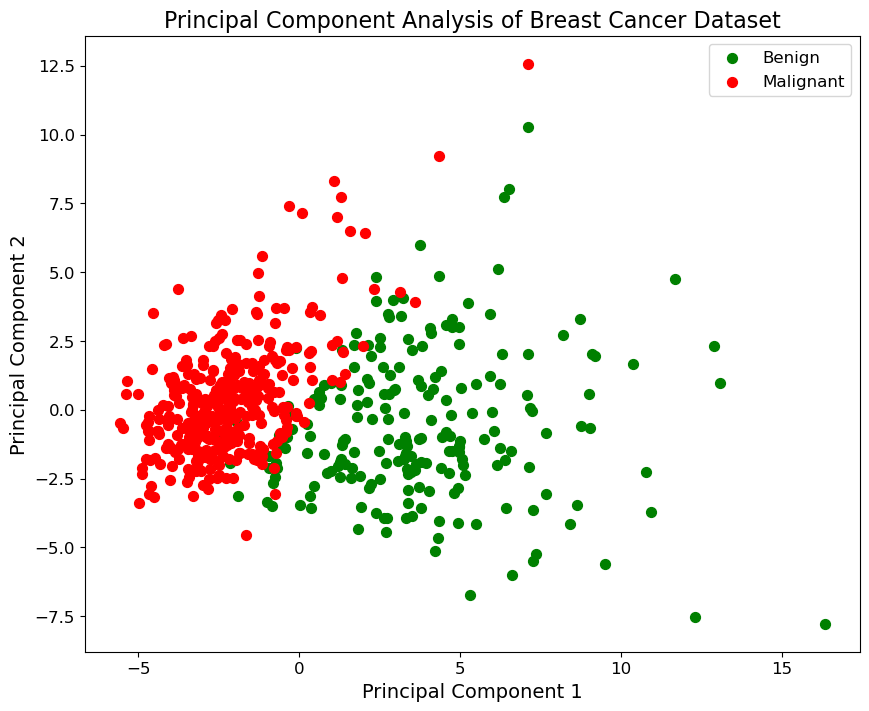

In [ ]:
# Plot config
plt.figure(figsize=(10, 8))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=16)

TARGETS = ["Benign", "Malignant"]
COLORS = ["g", "r"]
SIZE = 50

for target, color in itertools.zip_longest(TARGETS, COLORS):
    idx_to_keep = data["labels"] == target
    plt.scatter(
        pca_breast_Df.loc[idx_to_keep, "principal component 1"],
        pca_breast_Df.loc[idx_to_keep, "principal component 2"],
        c=color,
        s=SIZE,
    )

plt.legend(TARGETS, prop={"size": 12})
plt.show()

<br>

## Types of Categorical Variables Encoding
* One-hot 
* Ordinal
* Count Frequency
* Mean 
* Weight of Evidence

In [ ]:
# Load data
fp = "data/titanic_train.csv"
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
titanic_data = load_data(filename=fp)
titanic_data.drop(columns=cols_to_drop, inplace=True)
titanic_data.dropna(inplace=True)

titanic_data.head()

Shape of data: (891, 12)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
SibSp_labels_to_keep = [0, 1]
Parch_labels_to_keep = [0, 1, 2]
replace_val = "others"

# ===== SibSp =====
titanic_data["SibSp"] = np.where(
    titanic_data["SibSp"].isin(SibSp_labels_to_keep), titanic_data["SibSp"], replace_val
)

# ===== Parch =====
titanic_data["Parch"] = np.where(
    titanic_data["Parch"].isin(Parch_labels_to_keep), titanic_data["Parch"], replace_val
)

In [ ]:
cat_data = titanic_data.select_dtypes(include=["O"])

cat_data.head()

,Sex,SibSp,Parch,Embarked
0,male,1,0,S
1,female,1,0,C
2,female,0,0,S
3,female,1,0,S
4,male,0,0,S


### One-hot Encoding

In [ ]:
pd.get_dummies(cat_data).head()

,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_others,Parch_0,Parch_1,Parch_2,Parch_others,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


vars_to_enc = ["Sex", "SibSp", "Parch", "Embarked"]

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Sex', 'SibSp', 'Parch', 'Embarked'])])

In [ ]:
transf_data = col_transformer.fit_transform(cat_data)
transf_data = pd.DataFrame(transf_data, columns=col_transformer.get_feature_names_out())
transf_data.head()

,ohe__Sex_female,ohe__Sex_male,ohe__SibSp_0,ohe__SibSp_1,ohe__SibSp_others,ohe__Parch_0,ohe__Parch_1,ohe__Parch_2,ohe__Parch_others,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S
0,0,1,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,0,0,0,0,0,1


### Ordinal Encoding

* Ordinal encoding is the process of substituting integers from 1 to n (or 0 to n-1, depending the implementation) for the categories where n is the number of distinct categories of the variable.

In [ ]:
cat_data["Sex"].unique()  # male:0, female:1

array(['male', 'female'], dtype=object)

In [ ]:
temp = cat_data.copy()

feat = "Sex"
features = [feat, "encoded_var"]


mapper = {k: i for i, k in enumerate(temp[feat].unique(), start=0)}
mapper

{'male': 0, 'female': 1}

In [ ]:
temp["encoded_var"] = temp[feat].map(mapper)

temp[features].head()

,Sex,encoded_var
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [ ]:
temp = cat_data.copy()

temp.head()

,Sex,SibSp,Parch,Embarked
0,male,1,0,S
1,female,1,0,C
2,female,0,0,S
3,female,1,0,S
4,male,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate
le_sex = LabelEncoder()

# Fit
enc_var = le_sex.fit_transform(cat_data[feat])

temp["encoded_var"] = enc_var
features = [feat, "encoded_var"]


temp[features].head()

,Sex,encoded_var
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


### Count Frequency Encoding

* Count encoding replaces the **categories** in the dataset with the **count of observations** that show that category.
* The frequency **(or percentage) of observations** in the dataset can be used to replace the category in a similar manner. 

In [ ]:
temp = cat_data.copy()

temp.head()

,Sex,SibSp,Parch,Embarked
0,male,1,0,S
1,female,1,0,C
2,female,0,0,S
3,female,1,0,S
4,male,0,0,S


In [ ]:
feat = "Embarked"

mapper = temp[feat].value_counts().to_dict()
mapper

{'S': 554, 'C': 130, 'Q': 28}

In [ ]:
temp["encoded_var"] = temp[feat].map(mapper)
features = [feat, "encoded_var"]

temp[features].head()

,Embarked,encoded_var
0,S,554
1,C,130
2,S,554
3,S,554
4,S,554


In [ ]:
# Using percentage
mapper = temp[feat].value_counts(normalize=True).to_dict()
temp["encoded_var"] = temp[feat].map(mapper)


temp[features].head()

,Embarked,encoded_var
0,S,0.778090
1,C,0.182584
2,S,0.778090
3,S,0.778090
4,S,0.778090


<hr>

### Mean Encoding

* The **target variable** is used as the basis for generating the new encoded feature with mean encoding. 
* It captures information within the label, therefore rendering more predictive features
* It creates a monotonic relationship between the variable and the target.

In [ ]:
temp = titanic_data.copy()
TARGET = "Survived"
features = ["Sex", "SibSp", "Parch", "Embarked", TARGET]
temp = temp[features]


temp.head()

,Sex,SibSp,Parch,Embarked,Survived
0,male,1,0,S,0
1,female,1,0,C,1
2,female,0,0,S,1
3,female,1,0,S,1
4,male,0,0,S,0


In [ ]:
feat = "Sex"

mapper = temp.groupby([feat])[TARGET].mean().to_dict()
mapper

{'female': 0.752895752895753, 'male': 0.2052980132450331}

In [ ]:
temp.groupby([feat])[TARGET].mean()  # .to_dict()

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

In [ ]:
temp["encoded_var"] = temp[feat].map(mapper)
features = [feat, "encoded_var"]

temp[features].head()

,Sex,encoded_var
0,male,0.205298
1,female,0.752896
2,female,0.752896
3,female,0.752896
4,male,0.205298


## Apply PCA

In [ ]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
titanic_data["Parch"].value_counts()

0         519
1         110
2          68
others     15
Name: Parch, dtype: int64

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


vars_to_enc = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
vars_to_scale = ["Age", "Fare"]

# ===== OHE =====
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("ohe", ohe, vars_to_enc), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'SibSp', 'Parch',
                                  'Embarked']),
                                ('scaler', MinMaxScaler(), ['Age', 'Fare'])])

In [ ]:
X = titanic_data.drop(columns=["Survived"])
y = titanic_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((569, 7), (143, 7))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
NUM_COMPONENTS = 2


log_model_pipe = Pipeline(
    steps=[
        # ==== Column Transformer ====
        ("col_transformer", col_transformer),
        # ==== PCA ====
        ("PCA", PCA(n_components=NUM_COMPONENTS)),
        # ==== Estimator ====
        ("log_model", LogisticRegression(random_state=RANDOM_STATE)),
    ]
)


log_model_pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Fare'])])),
                ('PCA', PCA(n_components=2)),
                ('log_model', LogisticRegression(random_state=123))])

In [ ]:
# Fit
log_model_pipe.fit(X_train, y_train)

y_pred = log_model_pipe.predict(X_test)
y_proba = log_model_pipe.predict_proba(X_test)[:, 1]

In [ ]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred)


print(clf_report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        83
           1       0.82      0.68      0.75        60

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143



In [ ]:
y_test.shape

(143,)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_proba)

auc_score = metrics.auc(fpr, tpr)
auc_score

0.8244979919678714

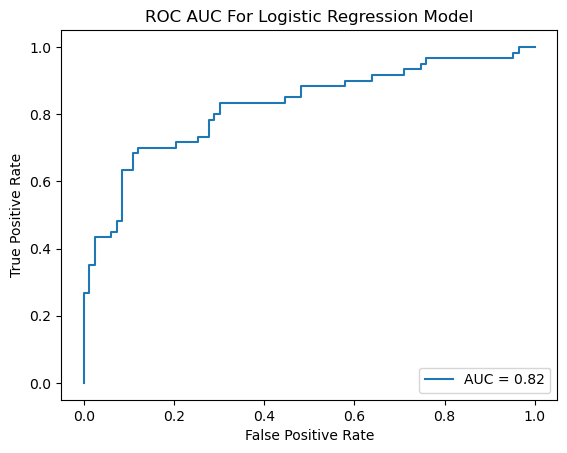

In [ ]:
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

<hr>

### Weight Of Evidence (WoE) Encoding

* You can read about that.
* Resources
    * [WoE 1](https://anakin297.medium.com/feature-engineering-categorical-encoding-weight-of-evidence-counts-frequency-9d4d8a1b325f)
    * [WoE 2](https://www.kaggle.com/code/davidbnn92/weight-of-evidence-encoding)

## Additional Resources

1. [PCA (Video)](https://www.youtube.com/watch?v=HMOI_lkzW08)
2. [PCA (Video 2)](https://www.youtube.com/watch?v=8klqIM9UvAc)
3. [K Means (Video)](https://www.youtube.com/watch?v=iNlZ3IU5Ffw)